In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import json


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 一、任务说明

* 任务主题： 论文作者统计，统计所有论文作者出现频率Top10的名字
* 任务内容： 论文作者的统计、使用pandas读取数据并使用字符串的操作
* 任务成果： 学习pandas的字符串操作


## 二、数据处理


### 2.1 数据分析 和 基础知识

* 论文数据集种作者author字段是一个字符串格式，每个作者用逗号分开，同时里面有特殊符号，所以我们需要对字符串切分并且剔除单个作者名字中的非常规的字符

* pandas中的字符串处理

### 2.2 代码实现

* 数据读取

In [83]:
#
data  = []

with open("D:/z_personal_file/data/arxiv-metadata-oai-snapshot.json", 'r') as f:
    for idx,line in enumerate(f):
       # if idx>10000:
        #    break
        d = json.loads(line)
        d = {'authors': d['authors'],
             'categories':d['categories'],
             'authors_parsed':d['authors_parsed'],}
            
        data.append(d)
        
data = pd.DataFrame(data)
data.head()            

,authors,categories,authors_parsed
0,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",hep-ph,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,Ileana Streinu and Louis Theran,math.CO cs.CG,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,Hongjun Pan,physics.gen-ph,"[[Pan, Hongjun, ]]"
3,David Callan,math.CO,"[[Callan, David, ]]"
4,Wael Abu-Shammala and Alberto Torchinsky,math.CA math.FA,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


接下来进行数据统计：
   * 统计所有作者出现的频率TOP10

In [84]:
#  计算机类的数据

data_cs = data[data['categories'].apply(lambda x: 'cs.CV' in x)]
data_cs.head()

,authors,categories,authors_parsed
1266,"Laurence Likforman-Sulem, Abderrazak Zahour, B...",cs.CV,"[[Likforman-Sulem, Laurence, ], [Zahour, Abder..."
3634,Fulufhelo Vincent Nelwamondo and Tshilidzi Mar...,cs.CV cs.IR,"[[Nelwamondo, Fulufhelo Vincent, ], [Marwala, ..."
4201,"Erik Berglund, Joaquin Sitte",cs.NE cs.AI cs.CV,"[[Berglund, Erik, ], [Sitte, Joaquin, ]]"
4216,"Mourad Zerai, Maher Moakher",cs.CV,"[[Zerai, Mourad, ], [Moakher, Maher, ]]"
4451,"Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...",cs.CV,"[[Marteau, Pierre-François, , VALORIA], [Ménie..."


In [85]:
# 拼接所有的作者名字
all_authors =[]
for i in data_cs['authors_parsed']:
    all_authors+=i
    
all_authors[:10]

[['Likforman-Sulem', 'Laurence', ''],
 ['Zahour', 'Abderrazak', ''],
 ['Taconet', 'Bruno', ''],
 ['Nelwamondo', 'Fulufhelo Vincent', ''],
 ['Marwala', 'Tshilidzi', ''],
 ['Berglund', 'Erik', ''],
 ['Sitte', 'Joaquin', ''],
 ['Zerai', 'Mourad', ''],
 ['Moakher', 'Maher', ''],
 ['Marteau', 'Pierre-François', '', 'VALORIA']]

In [86]:
# 得到所有的作者names
author_names = [" ".join(x) for x in all_authors]
author_names = pd.DataFrame(author_names)
author_names.head()

,0
0,Likforman-Sulem Laurence
1,Zahour Abderrazak
2,Taconet Bruno
3,Nelwamondo Fulufhelo Vincent
4,Marwala Tshilidzi


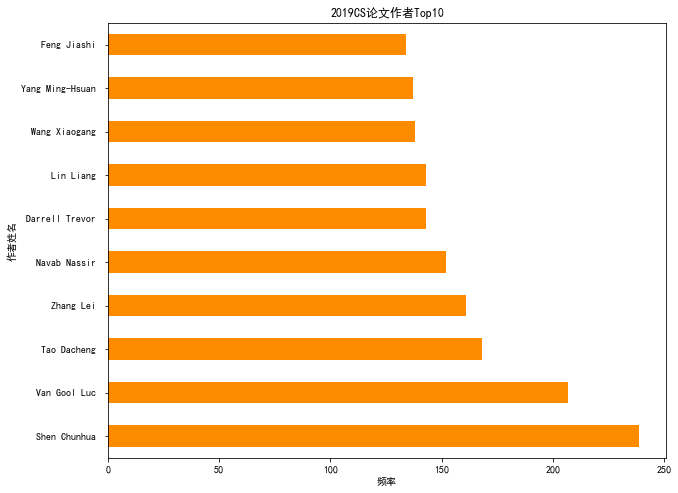

In [87]:
# 绘制频率图

plt.figure(figsize=(10,8))
author_names.value_counts().head(10).plot(kind = 'barh',color = 'darkorange')


# 
names = author_names[0].value_counts().head(10).index.values[:10]
plt.title('2019CS论文作者Top10')
plt.xlabel('频率')
plt.ylabel('作者姓名')
_ = plt.yticks(ticks=range(len(names)),
           labels=names)

In [88]:
author_names.head()

,0
0,Likforman-Sulem Laurence
1,Zahour Abderrazak
2,Taconet Bruno
3,Nelwamondo Fulufhelo Vincent
4,Marwala Tshilidzi


* 统计所有作者姓（姓名最后一个单词）的出现频率的TOP10

In [89]:
# 获取姓氏

authors_lastname = [x[0] for x in all_authors]
authors_lastname = pd.DataFrame(data=authors_lastname,columns=['last_name'])
authors_lastname.head()

,last_name
0,Likforman-Sulem
1,Zahour
2,Taconet
3,Nelwamondo
4,Marwala


Text(0, 0.5, '作者姓氏')

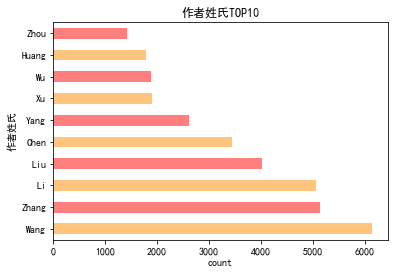

In [90]:
# 绘图

data = authors_lastname['last_name'].value_counts().head(10)
data.plot(kind = 'barh',color = ['darkorange','red'],alpha=0.5) #['darkorange','red'])


# 设置绘图格式

plt.title('作者姓氏TOP10')
plt.xlabel('count')
plt.ylabel('作者姓氏')

* 统计所有作者姓第一个字符的频率

In [91]:
# 获取第一个字母

first_letter = [ x[0][0].upper()  for x in all_authors]
first_letter = pd.DataFrame(first_letter,columns = ['first_letter'])
first_letter.head()



,first_letter
0,L
1,Z
2,T
3,N
4,M


Text(0, 0.5, '作者姓氏首字母')

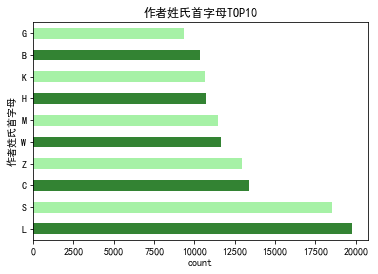

In [92]:
# 

# 绘图

data = first_letter['first_letter'].value_counts().head(10)
data.plot(kind = 'barh',color = ['darkgreen','lightgreen'],alpha=0.8) #['darkorange','red'])


# 设置绘图格式

plt.title('作者姓氏首字母TOP10')
plt.xlabel('count')
plt.ylabel('作者姓氏首字母')